<a href="https://colab.research.google.com/github/saadz-khan/tukl-intern-prog/blob/master/practice_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Dataset Hands on Practice

In [1]:
#updating fastai to v2 to solve version issues
!pip install git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-tobt4o6_
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-tobt4o6_
     |████████████████████████████████| 61kB 5.9MB/s 
  Created wheel for fastai: filename=fastai-2.4.2-cp37-none-any.whl size=188330 sha256=440fbb92f335095d18f5364fb4d0a7b15028df3e9bde86c8e01c28d35e24c5ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-95h_2r9n/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *
path = untar_data(URLs.MNIST)
dls = ImageDataLoaders.from_folder(path, 
                                   valid_pct = 0.2, item_tfms=RandomResizedCrop(224,min_scale=0.3))

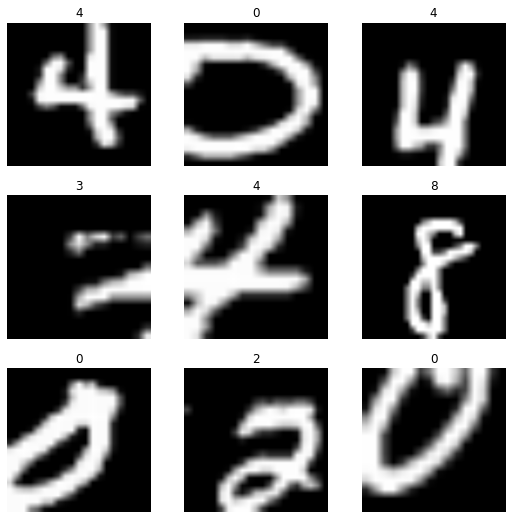

In [3]:
dls.train.show_batch()

In [4]:
# Setting up the model 
model = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
# Fine tuning the pretrained model for 2 epochs just to get best results in the short amount of time.
model.fine_tune(epochs=2)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.393389,0.093612,0.029071,04:26


epoch,train_loss,valid_loss,error_rate,time
0,0.136020,0.061020,0.017143,05:49
1,0.064657,0.013255,0.003714,05:48


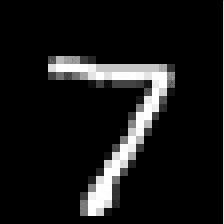

In [6]:
from PIL import Image
img = Image.open('/content/sample1.png')
n_img=img.resize((224,224))
n_img.save('sample2.png')
img = Image.open('/content/sample2.png')
img

In [7]:
# Checking the total vocab of the model
model.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [8]:
# Predicting the uploaded image on the model.
model.predict('/content/sample2.png')

('7',
 tensor(7),
 tensor([1.8435e-04, 7.8810e-03, 7.6191e-03, 1.0826e-03, 1.7856e-04, 5.7687e-05,
         3.3866e-05, 9.8241e-01, 3.4972e-04, 1.9827e-04]))

In [9]:
import os

# .pkl file is made and saved
model.export(os.path.abspath('./export.pkl'))

learner = load_learner('/content/export.pkl')